# **Ch12_Q10_PCA(p.555)**
## In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.
## (a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.
Hint: There are a number of functions in Python that you can use to generate data. One example is the normal() method of the random() function in numpy; the uniform() method is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

In [42]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

np.random.seed(42)

n_classes = 3
n_observations_per_class = 20
n_variables = 50
mean_shift = 5

# Generate data for each class
data = []
labels = []


for i in range(n_classes):
    # Shift the mean for each class
    class_mean = i * mean_shift
    class_data = np.random.normal(loc=class_mean, scale=1, size=(n_observations_per_class, n_variables))
    class_data = np.random.normal(loc=class_mean, scale=1, size=(n_observations_per_class, n_variables))
    data.append(class_data)
    labels += [i] * n_observations_per_class

data = np.vstack(data)
X = np.concatenate(data)
y = np.array([0] * n_observations_per_class + [1] * n_observations_per_class + [2] * n_observations_per_class)
print(data.shape)


(60, 50)


## (b) Perform PCA on the 60 observations and plot the frst two principal component score vectors. Use a diferent color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the frst two principal component score vectors.

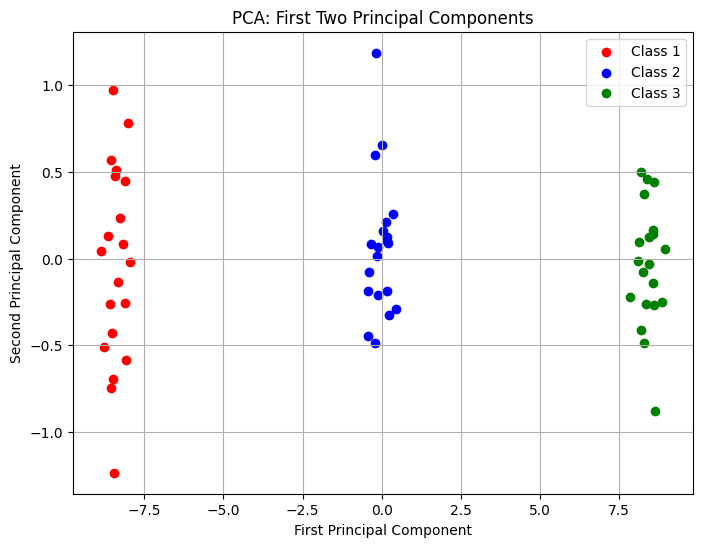

In [44]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame(data, columns=[f'Feature_{i+1}' for i in range(n_variables)])
df['Class'] = labels
X = df.drop('Class', axis=1)
y = df['Class']
# Standardize the features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', label='Class 1')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', label='Class 2')
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], color='green', label='Class 3')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First Two Principal Components')
plt.legend()
plt.grid(True)
plt.show()

## (c) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?
Hint: You can use the pd.crosstab() function in Python to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: K-means clustering
will arbitrarily number the clusters, so you cannot simply check
whether the true class labels and clustering labels are the same.

K-means Cluster   0   1   2
True Class                 
0                 0   0  20
1                20   0   0
2                 0  20   0


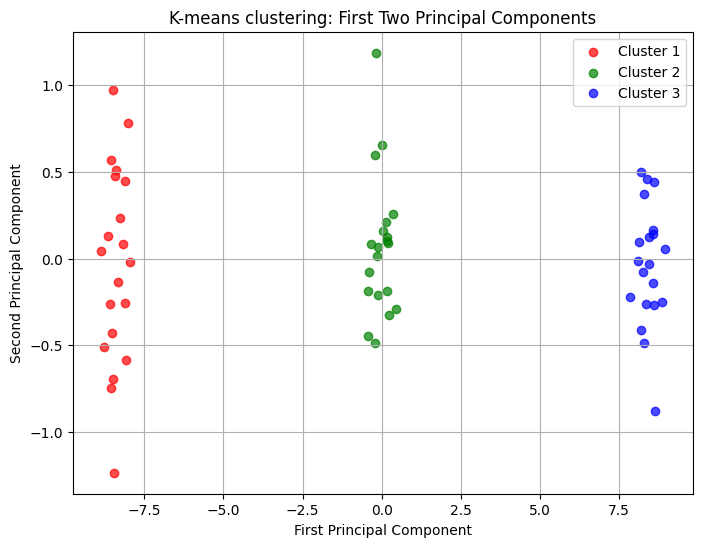

In [45]:
import pandas as pd
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

comparison = pd.crosstab(y, kmeans_labels, rownames=['True Class'], colnames=['K-means Cluster'])
print(comparison)

plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i, color in enumerate(colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, label=f'Cluster {i+1}', alpha=0.7)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-means clustering: First Two Principal Components')
plt.legend()
plt.grid(True)
plt.show()

## (d) Perform K-means clustering with K = 2. Describe your results.

K-means Cluster   0   1
True Class             
0                20   0
1                20   0
2                 0  20


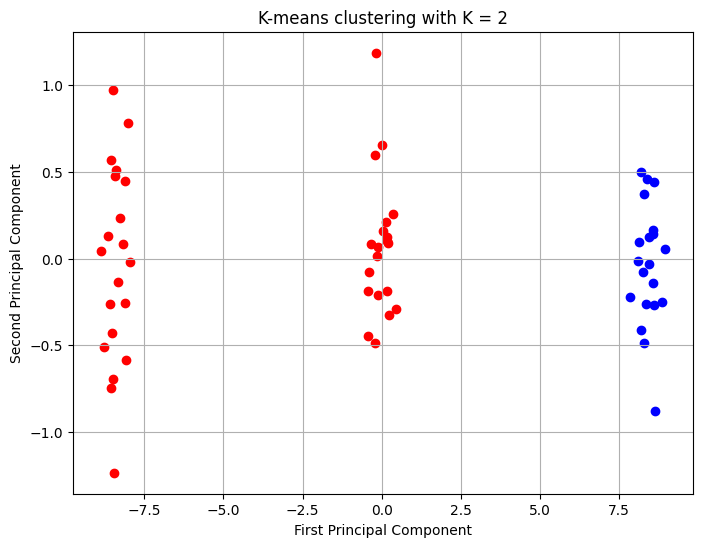

In [46]:
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_labels_2 = kmeans_2.fit_predict(X_scaled)

comparison_2 = pd.crosstab(y, kmeans_labels_2, rownames=['True Class'], colnames=['K-means Cluster'])

print(comparison_2)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[kmeans_labels_2 == 0, 0], X_pca[kmeans_labels_2 == 0, 1], color='red', label='Kmeans Cluster 1')
plt.scatter(X_pca[kmeans_labels_2 == 1, 0], X_pca[kmeans_labels_2 == 1, 1], color='blue', label='Kmeans Cluster 2')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-means clustering with K = 2')
plt.grid(True)
plt.show()

## (e) Now perform K-means clustering with K = 4, and describe your results.

K-means Cluster   0   1   2  3
True Class                    
0                 0   0  20  0
1                20   0   0  0
2                 0  12   0  8


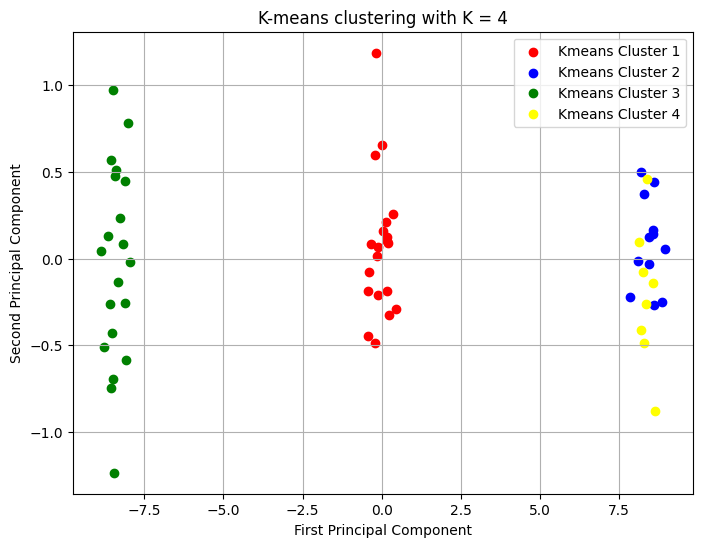

In [51]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_labels_4 = kmeans_4.fit_predict(X_scaled)

comparison_4 = pd.crosstab(y, kmeans_labels_4, rownames=['True Class'], colnames=['K-means Cluster'])

print(comparison_4)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[kmeans_labels_4 == 0, 0], X_pca[kmeans_labels_4 == 0, 1], color='red', label='Kmeans Cluster 1')
plt.scatter(X_pca[kmeans_labels_4 == 1, 0], X_pca[kmeans_labels_4 == 1, 1], color='blue', label='Kmeans Cluster 2')
plt.scatter(X_pca[kmeans_labels_4 == 2, 0], X_pca[kmeans_labels_4 == 2, 1], color='green', label='Kmeans Cluster 3')
plt.scatter(X_pca[kmeans_labels_4 == 3, 0], X_pca[kmeans_labels_4 == 3, 1], color='yellow', label='Kmeans Cluster 4')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-means clustering with K = 4')
plt.legend()
plt.grid(True)
plt.show()

## (f) Now perform K-means clustering with K = 3 on the frst two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the frst column is the frst principal component score vector, and the second column is the second principal component score vector. Comment on the results.

K-means Cluster (PCA)   0   1   2
True Class                       
0                       0   0  20
1                      20   0   0
2                       0  20   0


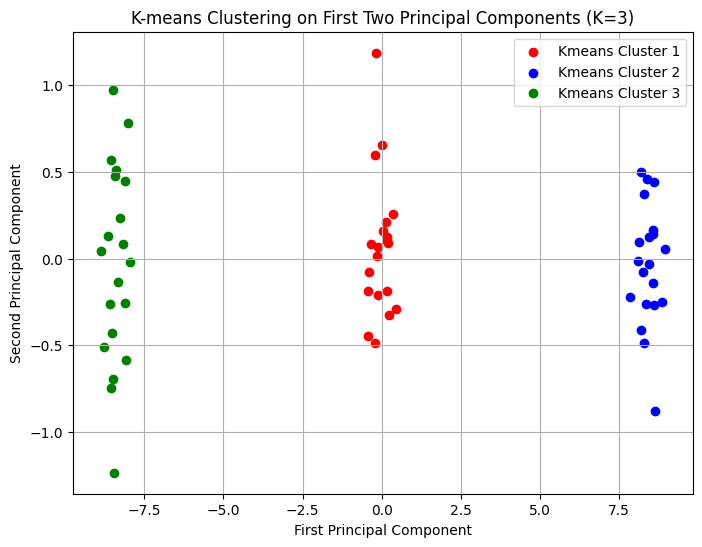

In [52]:
# Perform K-means clustering with K=3 on the first two principal components
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_labels_pca = kmeans_pca.fit_predict(X_pca)  # X_pca is the 60x2 matrix of the first two PCs

# Compare the K-means clusters on the PCs with the true class labels
comparison_pca = pd.crosstab(y, kmeans_labels_pca, rownames=['True Class'], colnames=['K-means Cluster (PCA)'])

# Print the comparison
print(comparison_pca)

# Plot the clusters on the first two PCs
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[kmeans_labels_pca == 0, 0], X_pca[kmeans_labels_pca == 0, 1], color='red', label='Kmeans Cluster 1')
plt.scatter(X_pca[kmeans_labels_pca == 1, 0], X_pca[kmeans_labels_pca == 1, 1], color='blue', label='Kmeans Cluster 2')
plt.scatter(X_pca[kmeans_labels_pca == 2, 0], X_pca[kmeans_labels_pca == 2, 1], color='green', label='Kmeans Cluster 3')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-means Clustering on First Two Principal Components (K=3)')
plt.legend()
plt.grid(True)
plt.show()

## (g) Using the StandardScaler() estimator, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

K-means Cluster (Scaled)   0   1   2
True Class                          
0                          0   0  20
1                         20   0   0
2                          0  20   0


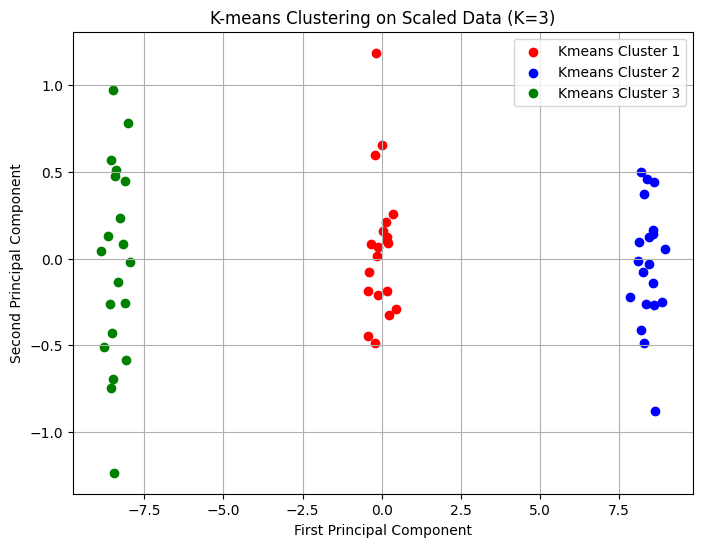

In [53]:
# Scale the data to have mean = 0 and standard deviation = 1
scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X)  # X contains the original 60x50 dataset

# Perform K-means clustering with K=3 on the scaled data
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
kmeans_labels_scaled = kmeans_scaled.fit_predict(X_scaled_full)

# Compare the K-means clusters on the scaled data with the true class labels
comparison_scaled = pd.crosstab(y, kmeans_labels_scaled, rownames=['True Class'], colnames=['K-means Cluster (Scaled)'])

# Print the comparison
print(comparison_scaled)

# Plot the clusters after scaling
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[kmeans_labels_scaled == 0, 0], X_pca[kmeans_labels_scaled == 0, 1], color='red', label='Kmeans Cluster 1')
plt.scatter(X_pca[kmeans_labels_scaled == 1, 0], X_pca[kmeans_labels_scaled == 1, 1], color='blue', label='Kmeans Cluster 2')
plt.scatter(X_pca[kmeans_labels_scaled == 2, 0], X_pca[kmeans_labels_scaled == 2, 1], color='green', label='Kmeans Cluster 3')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-means Clustering on Scaled Data (K=3)')
plt.legend()
plt.grid(True)
plt.show()


The first two principal components likely capture the majority of the variation that distinguishes the clusters. Hence, clustering the data after scaling (which includes all features) and clustering based on the principal components (which focus on the most important features) lead to similar results.